In [9]:
import pandas as pd
import numpy as np

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
events_data = pd.read_csv('../../data/introduction2DS/event_data_train.csv')

In [12]:
events_data.head(5)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [77]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data['date'].dt.date
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [78]:
submission_data = pd.read_csv('../../data/introduction2DS/submissions_data_train.csv')
submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit='s')
submission_data['day'] = submission_data['date'].dt.date
submission_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [36]:
submission_data.head(5)

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


<AxesSubplot:>

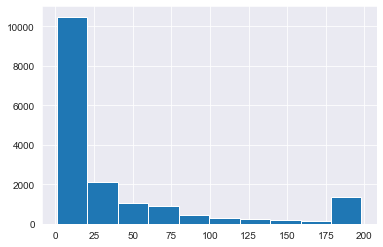

In [33]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns = {'step_id':'passed_steps'}).passed_steps.hist()

In [31]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().rename(columns= {'action' : 'id'}).head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

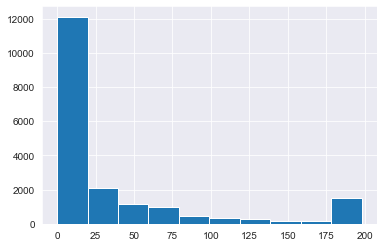

In [32]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().rename(columns= {'action' : 'id'}).discovered.hist()

In [101]:
users_events_data =  events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0)\
    .reset_index().rename(columns= {'action' : 'id'}).sort_values(by='started_attempt', ascending=False)
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
781,1046,128,124,721,8122
2611,3572,194,193,550,6968
6062,8394,131,94,337,1070
4825,6662,198,197,285,1054
1204,1649,194,194,281,807
...,...,...,...,...,...
4959,6846,1,1,0,1
12468,17307,1,1,0,1
4961,6848,12,11,0,14
4962,6849,1,1,0,17


In [37]:
user_scores = submission_data.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0).reset_index()

In [58]:
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [45]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list).apply(np.diff).values
gap_data =  pd.Series(np.concatenate(gap_data, axis=0))

In [48]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

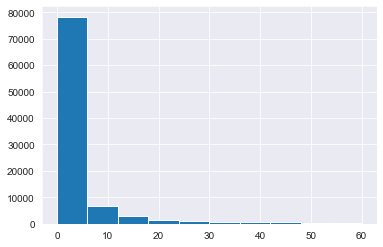

In [50]:
gap_data.hist()

In [54]:
gap_data.quantile(0.95)

59.760440972222156

In [94]:
users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp' : 'max'} ).rename(columns ={'timestamp':'last_timestamp'})

In [95]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [96]:
users_data['is_user_gone'] = (now - users_data['last_timestamp']) > drop_out_threshold

In [97]:
users_data

,user_id,last_timestamp,is_user_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [98]:
users_data = users_data.merge(user_scores, how = 'outer')

In [100]:
users_data = users_data.fillna(0)
users_data.head(30)

,user_id,last_timestamp,is_user_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [102]:
users_data = users_data.merge(users_events_data, how='outer')

In [108]:
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_day.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [110]:
users_data = users_data.merge(users_day, how='outer')

In [111]:
users_data.user_id.nunique()

19234

In [112]:
events_data.user_id.nunique()

19234

In [113]:
users_data.head()

,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [114]:
users_data['passed_course'] = users_data.passed > 170
users_data.head()

,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [115]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_user_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425
